<a href="https://colab.research.google.com/github/CameronChadwick/maine_climate/blob/main/maine_climate.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Imports

In [123]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math

# Load Data

In [124]:
prcp_url = "https://raw.githubusercontent.com/CameronChadwick/maine_climate/main/Cameron%20Chadwick%20-%20All_Months_PCP_1895_2022_1.csv"
temp_url = "https://raw.githubusercontent.com/CameronChadwick/maine_climate/main/Cameron%20Chadwick%20-%20All_Months_Temp_1895_2022.csv"

prcp_df = pd.read_csv(prcp_url)
temp_df = pd.read_csv(temp_url)
temp_df

,Date,January Temp(F),February Temp(F),March Temp(F),April Temp(F),May Temp(F),June Temp(F),July Temp(F),August Temp(F),September Temp(F),October Temp(F),November Temp(F),December Temp(F)
0,1895,12.2,11.8,21.3,38.1,53.3,62.7,63.2,61.6,55.6,39.3,32.6,20.7
1,1896,10.4,13.7,20.9,38.3,50.8,58.9,64.8,61.7,52.8,41.3,31.4,15.0
2,1897,12.8,16.0,23.4,38.3,49.5,55.2,65.1,61.2,52.9,44.5,30.0,18.7
3,1898,9.4,19.2,29.8,36.2,50.4,58.8,64.8,64.1,55.9,44.3,32.4,16.6
4,1899,11.7,11.9,21.7,39.0,49.8,59.8,63.8,62.4,53.1,45.6,30.4,22.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...
123,2018,15.0,22.7,28.9,36.5,53.5,59.0,68.8,68.0,57.9,41.9,28.6,20.4
124,2019,14.1,16.3,24.7,38.8,48.1,59.5,68.3,64.5,55.3,46.1,29.6,22.8
125,2020,20.8,20.1,29.6,37.7,51.2,62.5,68.9,65.6,56.8,44.7,37.0,27.2
126,2021,21.4,18.5,29.4,43.2,52.4,64.9,63.6,68.2,59.0,50.2,35.3,24.4


## Clean the Data

In [125]:
dec_temp_22 = [temp_df['December Temp(F)'][126], temp_df['December Temp(F)'][125], temp_df['December Temp(F)'][124]]
prcp_dec_22 = [prcp_df['December Inches'][126], prcp_df['December Inches'][125], prcp_df['December Inches'][124]]
prcp_jan_22 = [prcp_df['January Inches'][126], prcp_df['January Inches'][125], prcp_df['January Inches'][124]]

def mean(data):
  added = 0
  for value in data:
    added += value
  divide = len(data)
  mean = added / divide
  return mean

dec_22_temp = round(mean(dec_temp_22), 1)
prcp_dec_22 = round(mean(prcp_dec_22), 1)
prcp_jan_22 = round(mean(prcp_jan_22), 1)

temp_df.replace(temp_df['December Temp(F)'][127], dec_22_temp, inplace=True)
prcp_df.replace(prcp_df['December Inches'][127], prcp_dec_22, inplace=True)
prcp_df.replace(prcp_df['January Inches'][127], prcp_jan_22, inplace=True)

print(temp_df['December Temp(F)'][127], prcp_df['January Inches'][127], prcp_df['December Inches'][127])

24.8 4.1 4.1


## Plotting Test

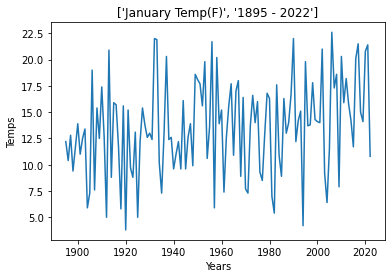

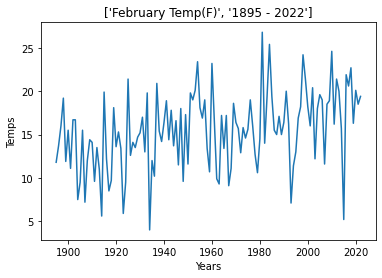

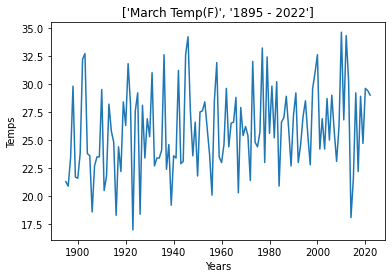

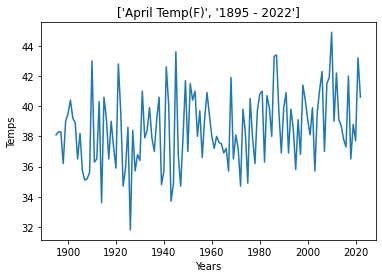

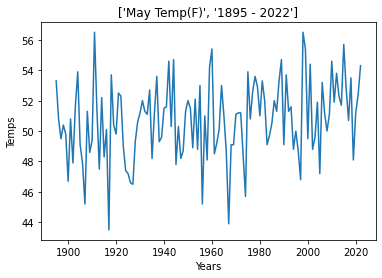

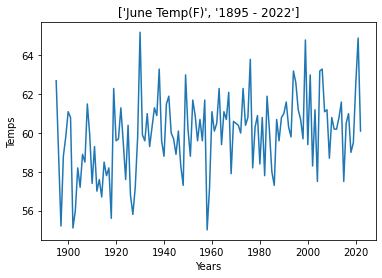

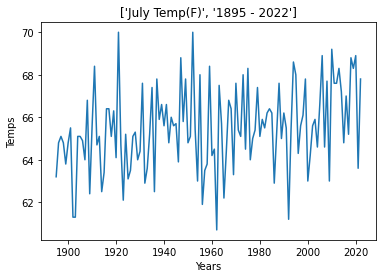

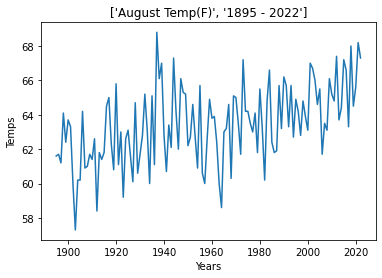

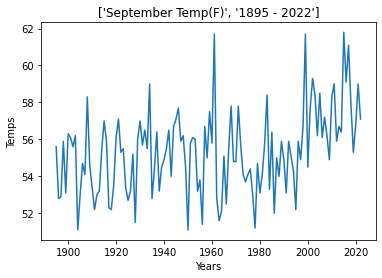

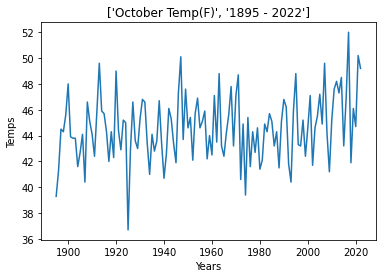

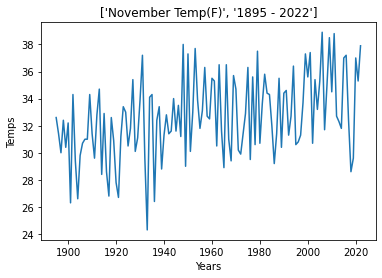

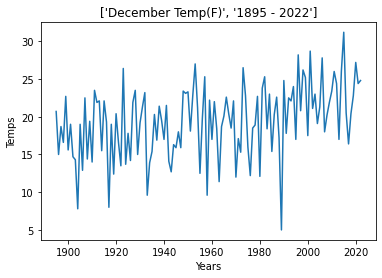

In [126]:
def monthly_data(frame, month, title, xlabel, ylabel):
  temps = frame[month].tolist()
  years = frame['Date'].tolist()
  plt.figure()
  plt.plot(years, temps)
  plt.title(title)
  plt.xlabel(xlabel)
  plt.ylabel(ylabel)

temp_months = temp_df.columns.tolist()
temp_months.pop(0)
prcp_months = prcp_df.columns.tolist()
prcp_months.pop(0)

for index in range(len(temp_months)):
  monthly_data(temp_df, temp_months[index], [temp_months[index],'1895 - 2022'], 'Years', 'Temps')

# Getting Statistics

In [127]:
def yearly_stats(frame):
  frame['Yearly Average'] = round(frame.iloc[:,1:13].mean(axis = 1), 1)
  frame['Yearly Median'] = round(frame.iloc[:,1:13].median(axis = 1), 1)
  frame['Yearly Deviation'] = round(frame.iloc[:,1:13].std(axis = 1), 1)
  frame['Yearly Min'] = frame.iloc[:,1:13].min(axis = 1)
  frame['Yearly Max'] = frame.iloc[:,1:13].max(axis = 1)
  return frame.tail(15)

def monthly_stats(frame):
  means = round(frame.iloc[:,1:13].mean(axis=0), 1)
  medians = round(frame.iloc[:,1:13].median(axis=0), 1)
  dev = round(frame.iloc[:,1:13].std(axis=0), 1)
  min = frame.iloc[:,1:13].min(axis=0)
  max = frame.iloc[:,1:13].max(axis=0)
  return means, medians, dev, min, max

def min_max_year(frame, mons, min_max):
  min_dates = []

  for index in range(len(mons)):
    min = frame.loc[frame[mons[index]] == monthly_stats(frame)[min_max][index]]
    min_dates.append(min.iloc[0,0])
  return min_dates

yearly_stats(temp_df)
yearly_stats(prcp_df)

min_max_year(temp_df, temp_months, 3)

[1920, 1934, 1923, 1926, 1917, 1958, 1962, 1903, 1904, 1925, 1933, 1989]

# Plotting Statistics

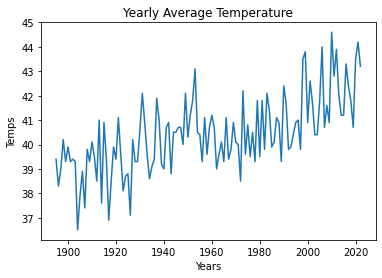

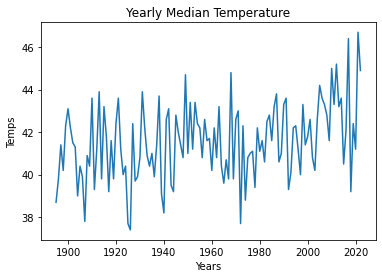

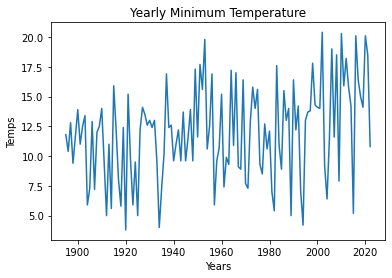

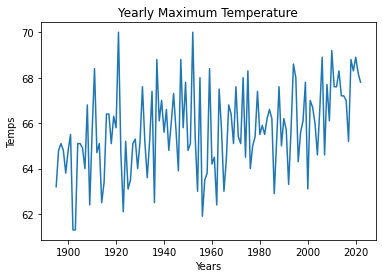

In [128]:
def plotting_yearly(frame, col, title, xlabel, ylabel):
  plt.figure()
  plt.plot(frame['Date'], frame[col])
  plt.title(title)
  plt.xlabel(xlabel)
  plt.ylabel(ylabel)

plotting_yearly(temp_df, 'Yearly Average', 'Yearly Average Temperature', 'Years', 'Temps')
plotting_yearly(temp_df, 'Yearly Median', 'Yearly Median Temperature', 'Years', 'Temps')
plotting_yearly(temp_df, 'Yearly Min', 'Yearly Minimum Temperature', 'Years', 'Temps')
plotting_yearly(temp_df, 'Yearly Max', 'Yearly Maximum Temperature', 'Years', 'Temps')

# plt.figure()
# plt.plot(temp_df['Date'], temp_df['Yearly Min'])
# plt.plot(temp_df['Date'], temp_df['Yearly Max'])
# plt.title('Min and Max Temps')
# plt.xlabel('Years')
# plt.ylabel('Temps')

## Moving Average Function

In [133]:
def weighted(x_list, w, fil_len):
  output = []
  ns = fil_len - 1
  for index in range(len(x_list) - ns):
    wxl = 0
    for n in range(fil_len):
      wx = (w[n] * x_list[n + index])
      wxl += wx

    wsum = sum(w)
    weight_avg_val = wxl/wsum
    output.append(weight_avg_val)
  return output

## Plotting With Averages

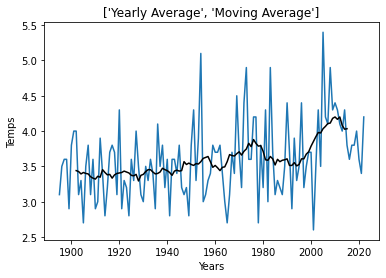

In [138]:
def plotting_avg(frame, col, leng, title, xlabel, ylabel):
  wts = [1 for i in range(leng)]
  move_col = weighted(frame[col], wts, leng)
  move_year = weighted(frame['Date'], wts, leng)
  
  plt.figure()
  plt.plot(frame['Date'], frame[col])
  plt.plot(move_year, move_col, color='black')
  plt.title([col, title])
  plt.xlabel(xlabel)
  plt.ylabel(ylabel)


plotting_avg(prcp_df, 'Yearly Average', 15, 'Moving Average', 'Years', 'Temps')